# Статистический анализ данных:  Анализ сервиса аренды самокатов GoFast

Основная цель проекта: проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:

БЕЗ ПОДПИСКИ:

    - абонентская плата отсутствует;

    - стоимость одной минуты поездки — 8 рублей;

    - стоимость старта (начала поездки) — 50 рублей;

С ПОДПИСКОЙ ULTRA:

    - абонентская плата — 199 рублей в месяц;

    - стоимость одной минуты поездки — 6 рублей;

    - стоимость старта — бесплатно.


План проекта:

Шаг 1. Загрузка данных
- 1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:

    /datasets/users_go.csv
    
    /datasets/rides_go.csv
    
    /datasets/subscriptions_go.csv
    
- 1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

Шаг 2. Предобработка данных
- 2.1 Привём столбец date к типу даты pandas.
- 2.2 Создадим новый столбец с номером месяца на основе столбца date.
- 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

Шаг 3. Исследовательский анализ данных
Опишем и визуализируйте общую информацию о пользователях и поездках:
- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.

Шаг 4. Объединение данных
- 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().
- 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
  c данными о пользователях без подписки;
  с данными о пользователях с подпиской.
- 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Шаг 5. Подсчёт выручки
- 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём - суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
- 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- 6.2 Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  3130 метров? Проверим гипотезу и сделаем выводы.
- 6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.
- 6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Шаг 7 Общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


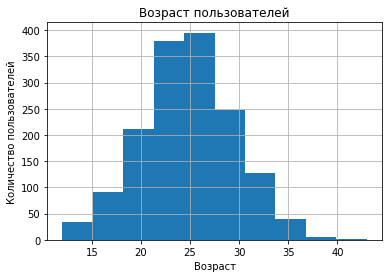

In [79]:
data_users['age'].hist();
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');
plt.title('Возраст пользователей');

In [80]:
print(data_users['subscription_type'].value_counts())

free     835
ultra    699
Name: subscription_type, dtype: int64


In [5]:
print(data_users['city'].value_counts())

Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64


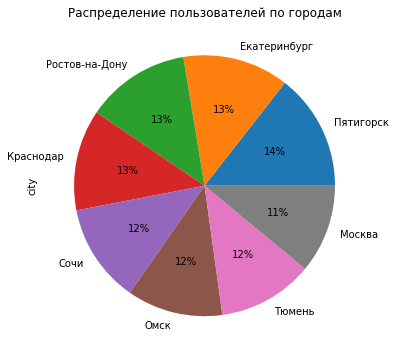

In [6]:
data_users['city'].value_counts().plot(kind='pie', y=data_users['city'].value_counts(),\
                                       autopct = '%1.0f%%', figsize=(6,6), title='Распределение пользователей по городам');

In [7]:
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
top_usr = data_rides['user_id'].value_counts()
print(top_usr.head(10))

1236    27
783     26
1063    26
1204    24
1149    23
716     23
1531    23
1030    23
1049    22
895     22
Name: user_id, dtype: int64


In [10]:
top_usr_dist = data_rides.groupby('user_id').sum().sort_values(by='distance', ascending=False)
print(top_usr_dist.head(10))

             distance    duration
user_id                          
1063     79325.846482  440.533761
1236     78744.976586  446.233013
1361     77773.501423  408.979310
1468     77392.080789  429.513327
1374     74901.673366  394.418821
895      74266.723567  417.896744
1204     72873.754697  432.153686
1383     71564.205631  401.388850
1217     71525.424486  355.845697
1419     71074.358791  403.344101


In [11]:
top_usr_dur = data_rides.groupby('user_id').sum().sort_values(by='duration', ascending=False)
print(top_usr_dur.head(10))

             distance    duration
user_id                          
1236     78744.976586  446.233013
1063     79325.846482  440.533761
783      68009.897540  435.186652
871      69047.297122  433.501726
1204     72873.754697  432.153686
1149     67160.338802  431.510146
1468     77392.080789  429.513327
895      74266.723567  417.896744
90       63008.189707  411.822515
1361     77773.501423  408.979310


In [12]:
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [13]:
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод: Загрузили и рассмотрели данные, вывели первые строки каждого набора данных. Изучили общую информацию о каждом датафрейме.

Основные пользователи - люди от 20 до 30 лет

Распределение пользователей по городам +- одинаковое:

Наибольшее количество пользователей в Пятигорске, Наименьшее - в Москве

Чуть больше пользователей с бесплатным тарифом

## Шаг 2. Предобработка данных

### Приведём столбец date к типу даты pandas

In [14]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создадим новый столбец

In [60]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [63]:
# Получается, мы имеем данные за один год - 2021
data_rides['date'].dt.year.unique()

array([2021])

### Проверим наличие пропусков и дубликатов

In [16]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [18]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [19]:
data_users.duplicated().sum()

31

In [20]:
data_users.drop_duplicates(inplace=True)

In [21]:
data_rides.duplicated().sum()

0

In [22]:
data_sub.duplicated().sum()

0

Вывод: Привели столбец date к типу даты pandas

Пропущенных данных в таблицах нет.

Дубликаты имеются среди пользователей, удалили строки-дубликаты.

Добавили столбец month с номер месяца.

## Шаг 3. Исследовательский анализ данных

### частота встречаемости городов;

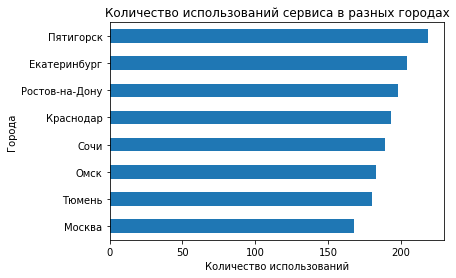

In [86]:
data_users['city'].value_counts(ascending=True).plot(kind='barh', title='Количество использований сервиса в разных городах');
plt.xlabel('Количество использований')
plt.ylabel('Города')
plt.show()

### соотношение пользователей с подпиской и без подписки;

In [24]:
sub_type = data_users['subscription_type'].value_counts()
print(sub_type)

free     835
ultra    699
Name: subscription_type, dtype: int64


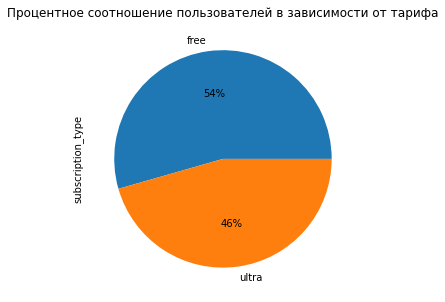

In [25]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = sub_type, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

### возраст пользователей;

In [26]:
age_usr = data_users['age'].value_counts()
age_usr

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

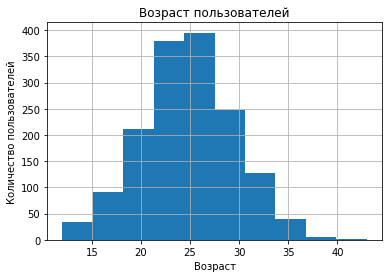

In [87]:
data_users['age'].hist(bins=10);
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');
plt.title('Возраст пользователей');

In [28]:
data_users['age'].sort_values().head(10)

664     12
66      12
727     12
34      12
235     13
1249    13
314     13
83      13
553     13
1241    13
Name: age, dtype: int64

In [29]:
data_users['age'].sort_values(ascending=False).head(10)

1201    43
961     39
804     38
453     38
383     38
205     37
848     37
721     36
1491    36
644     36
Name: age, dtype: int64

In [30]:
data_users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


### расстояние, которое пользователь преодолел за одну поездку;

In [31]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

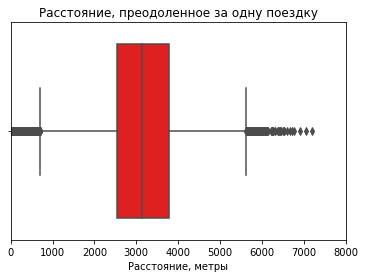

In [88]:
sns.boxplot(x=data_rides['distance'], color='red')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, метры')
_ = plt.xlim(0, 8000)

### продолжительность поездок.

In [33]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

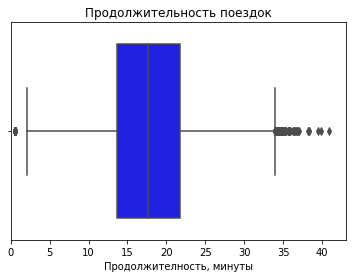

In [89]:
sns.boxplot(x=data_rides['duration'], color='blue')
plt.title('Продолжительность поездок')
plt.xlabel('Продолжителность, минуты')
_ = plt.xlim(0, 43)

Вывод

Частота встречаемости городов

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что Пятигорск по размерам в несколько раз меньше Москвы, т.е. в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

Соотношение пользователей с подпиской и без подписки

Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.

Возраст пользователей

Самыми младшими являются пользователи 12, 13 лет.
Самыми старшими - 43, 39.
В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.

Расстояние, которое пользователь преодолел за одну поездку

Самая короткая дистанция - 0.86 км
Самая длинная - 7.2 км
В основном пользователи проезжают от 2.5 км до 4 км.

Продолжительность поездок

Самые короткие поездки - по пол минуты. Выглядят крайне странно, возможно пользователи просто передумали пользоваться самокатом. Либо же техническая неинсправность самого самоката.
Самая длинная поездка заняла 40 минут.
В основном же длительность поездки состовляет 13 - 22 минут.

## Шаг 4. Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [35]:
total_usr = data_users.merge(data_rides, on='user_id').merge(data_sub, on='subscription_type')

display(total_usr.head(20))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [126]:
# Проверка количества строк и столбцов в исходных данных
print("Исходные данные data_users:", data_users.shape[0])
print("Исходные данные data_rides:", data_rides.shape[0])
print("Исходные данные data_sub:", data_sub.shape[0])

# Проверка количества строк и столбцов в объединенном датафрейме
print("Объединенный датафрейм total_usr:", total_usr.shape[0])

Исходные данные data_users: 1534
Исходные данные data_rides: 18068
Исходные данные data_sub: 2
Объединенный датафрейм total_usr: 18068


Пустых строк или недостающих нет, следовательно, объединение прошло успешно

In [129]:
total_usr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 2.3+ MB


### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1

In [84]:
data_free_sub = total_usr.query("`subscription_type` == 'free'")
data_free_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [85]:
data_ultra_sub = total_usr.query("`subscription_type` == 'ultra'")
data_ultra_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

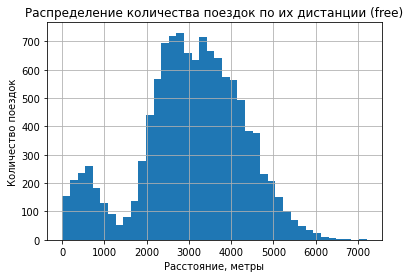

In [92]:
data_free_sub['distance'].hist(bins=40);
plt.xlabel('Расстояние, метры');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их дистанции (free)');

In [114]:
data_free_sub['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

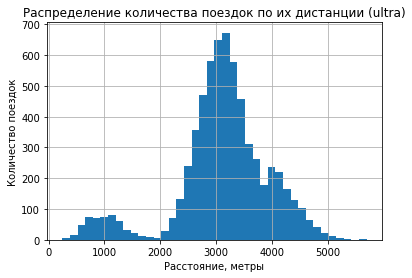

In [93]:
data_ultra_sub['distance'].hist(bins=40);
plt.xlabel('Расстояние, метры');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их дистанции (ultra)');

In [115]:
data_ultra_sub['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

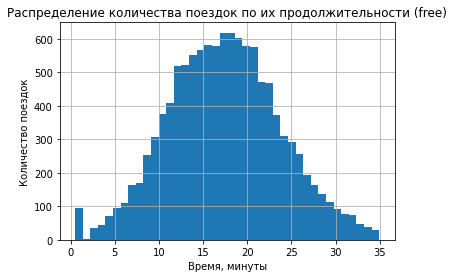

In [94]:
data_free_sub['duration'].hist(bins=40);
plt.xlabel('Время, минуты');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их продолжительности (free)');

In [119]:
data_free_sub['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

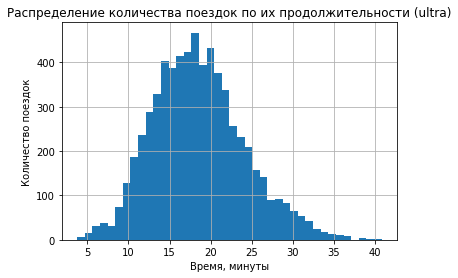

In [96]:
data_ultra_sub['duration'].hist(bins=40);
plt.xlabel('Время, минуты');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их продолжительности (ultra)');

In [118]:
data_ultra_sub['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

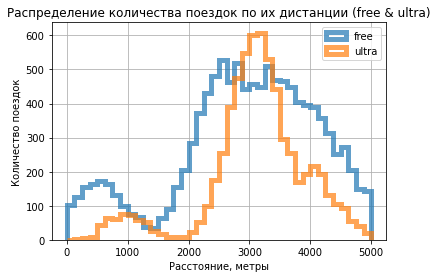

In [107]:
# Совместим распредления (дистанция)

free_distance = data_free_sub['distance']

ultra_distance = data_ultra_sub['distance']

ax = free_distance.plot(
    kind='hist',
    histtype='step',
    range=(0, 5000),
    bins=40,
    linewidth=5,
    alpha=0.7,
    label='free',
    grid=True,
    legend=True
);
ultra_distance.plot(
    kind='hist',
    histtype='step',
    range=(0, 5000),
    bins=40,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True
);
plt.xlabel('Расстояние, метры');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их дистанции (free & ultra)');

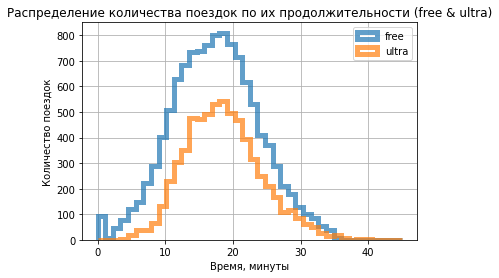

In [112]:
# Совместим распредления (Продолжительность)

free_duration = data_free_sub['duration']

ultra_duration = data_ultra_sub['duration']

ax = free_duration.plot(
    kind='hist',
    histtype='step',
    range=(0, 45),
    bins=40,
    linewidth=5,
    alpha=0.7,
    label='free',
    grid=True,
    legend=True
);

ultra_duration.plot(
    kind='hist',
    histtype='step',
    range=(0, 45),
    bins=40,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True
);
plt.xlabel('Время, минуты');
plt.ylabel('Количество поездок');
plt.title('Распределение количества поездок по их продолжительности (free & ultra)');

Вывод

Объединили данные о пользователях, поездках и тарифах в один датафрейм - total_usr.

Выделили два датафрейма на основе total_usr:

data_free_sub - Информация о пользователях с бесплатным тарифом
data_ultra_sub - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

Дополним вывод статистическими значениями:

Среднее время поездки для бесплатного тарифа: 17 минут (стандартное отклонение 6 минут), расстояние: 3 км (стандартное отклонение 1.2 км).

Среднее время поездки для платного тарифа: 18 минуты (стандартное отклонение 5 минуты), расстояние: 3.1 км (стандартное отклонение 0.8 км).

## Шаг 5. Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

In [42]:
full_data = total_usr.pivot_table(index=['user_id', 'month'], values=['distance', 'duration', 'name', 'subscription_type',]\
                                  ,aggfunc={'distance': sum, 'duration': sum, 'name': 'count', 'subscription_type': min})
full_data.head(20)

distance   duration  name subscription_type
user_id month                                                 
1       1       7027.511294  41.416640     2             ultra
        4        754.159807   6.232113     1             ultra
        8       6723.470560  44.776802     2             ultra
        10      5809.911100  31.578017     2             ultra
        11      7003.499363  53.397424     3             ultra
        12      6751.629942  27.203912     2             ultra
2       3      10187.723006  60.959959     3             ultra
        4       6164.381824  39.048633     2             ultra
        6       3255.338202  13.851127     1             ultra
        7       6780.722964  46.170157     2             ultra
        8        923.007439   6.914760     1             ultra
        10      2824.636598  18.779128     1             ultra
        12      3828.248580  11.920514     1             ultra
3       1       3061.777147  12.654443     1             ultra
        2       5421.152016  37.568637     2             ultra
        4       2956.651632  20.671364     1             ultra
        5       9064.026918  61.404503     3             ultra
        7      10919.595403  65.519784     3             ultra
        9       2891.012822  22.390055     1             ultra
        12      2593.381928  12.984728     1             ultra

In [43]:
full_data.rename(columns = {'name' : 'count_tips'}, inplace = True)

In [44]:
full_data['duration'] = np.ceil(full_data['duration'])

In [45]:
full_data.sort_values(by='month').head(20)

,,distance,duration,count_tips,subscription_type
user_id,month,,,,
1,1,7027.511294,42.0,2,ultra
686,1,9891.825690,52.0,3,ultra
685,1,4837.670420,46.0,2,ultra
682,1,2929.820795,25.0,1,ultra
680,1,3316.977004,18.0,1,ultra
679,1,6407.866143,37.0,2,ultra
675,1,3907.983157,21.0,1,ultra
674,1,2952.626152,11.0,1,ultra
673,1,3371.773487,24.0,1,ultra


In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11331 non-null  float64
 1   duration           11331 non-null  float64
 2   count_tips         11331 non-null  int64  
 3   subscription_type  11331 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 399.5+ KB


### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [47]:
def month_income(row):
    if row['subscription_type'] == 'ultra':
        return (6 * row['duration']) + 199
    elif row['subscription_type'] == 'free':
        return (8 * row['duration']) + 50
    return 'Unknown type'

In [48]:
full_data['month_income'] = full_data.apply(month_income, axis=1)
full_data['month_income'].head(20)

user_id  month
1        1        451.0
         4        241.0
         8        469.0
         10       391.0
         11       523.0
         12       367.0
2        3        565.0
         4        439.0
         6        283.0
         7        481.0
         8        241.0
         10       313.0
         12       271.0
3        1        277.0
         2        427.0
         4        325.0
         5        571.0
         7        595.0
         9        337.0
         12       277.0
Name: month_income, dtype: float64

In [49]:
full_data.head()

distance  duration  count_tips subscription_type  \
user_id month                                                        
1       1      7027.511294      42.0           2             ultra   
        4       754.159807       7.0           1             ultra   
        8      6723.470560      45.0           2             ultra   
        10     5809.911100      32.0           2             ultra   
        11     7003.499363      54.0           3             ultra   

               month_income  
user_id month                
1       1             451.0  
        4             241.0  
        8             469.0  
        10            391.0  
        11            523.0

Вывод: Создали новый датафрейм с агрегированными данными (full_data) на основе датафрейма с объединенными данными (total_usr).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 

Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## Шаг 6. Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Итак, проверим данную гипотезу.

Нулевая и альтернативная гипотезы:
Гипотеза Н0: Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.
Гипотеза Н1: Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.
alpha = 0.05

In [50]:
free = data_free_sub['duration']

ultra = data_ultra_sub['duration'] 

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


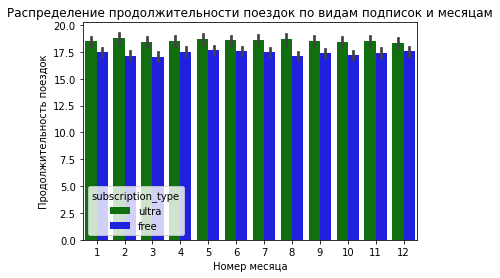

In [51]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = total_usr,
            palette = ['green', 'blue'])
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free< мы можем утверждать, что пользователи с подпиской больше времени на поездки.

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

3130 метров — оптимальное расстояние с точки зрения износа самоката

Нулевая и альтернативная гипотезы:

Гипотеза Н0: Среднее расстояние поездок с использованием подписки ‘ultra’ равно оптимальному расстоянию в 3130 метров.

Гипотеза Н1: Среднее расстояние поездок с использованием подписки ‘ultra’ больше 3130 метров.

In [124]:
ultra = data_ultra_sub['distance'] 

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    ultra, 
    interested_value,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая и альтернативная гипотезы:

Гипотеза Н0: Средняя выручка от поездок с разной подпиской равна.

Гипотеза Н1: Средняя выручка от поездок с использованием подписки ‘ultra’ больше, чем выручка с ипользованием подписки ‘free’.

In [53]:
free_usr = full_data.query('subscription_type == "free"')['month_income']

ultra_usr = full_data.query('subscription_type == "ultra"')['month_income']

results = st.ttest_ind(ultra_usr, free_usr, alternative='greater')

alpha = .05

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.577594269237221e-195
Отвергаем нулевую гипотезу


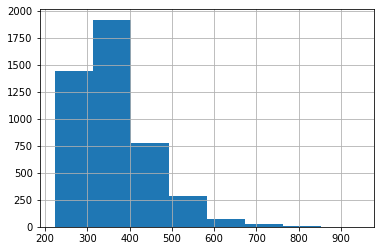

In [54]:
ultra_usr.hist(bins=8);

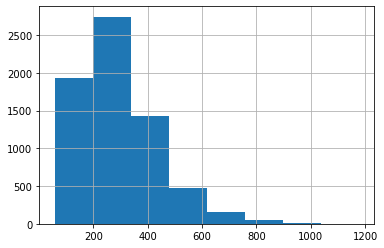

In [55]:
free_usr.hist(bins=8);

Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2
H1 : μ1 != μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

## Шаг 7. Общий вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. 

Поменяли тип данных у столбца date из датафрейма data_rides к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

Выяснили, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
Возраст пользователей укладывается в промежуток от 20 до 30 лет
В основном пользователи проезжают от 2.5 км до 4 км.
Чаще всего длительность поездки состовляет 13 - 22 минут
Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм full_data. Добавили в датафрейм full_data столбец с помесячной выручкой month_income.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу